In [ ]:
import pandas as pd
df = pd.read_csv("../../data/immo69-ventes.csv",delimiter=';',header=0,encoding="UTF-8",low_memory=False)
print (df.shape)
# display(df.head(20))
# keep only flats
df = df [df.typedebien == "a"]
print (df.info())
display(df.head(5))


(133369, 59)
<class 'pandas.core.frame.DataFrame'>
Index: 89190 entries, 6 to 133368
Data columns (total 59 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   idannonce                89190 non-null  object 
 1   type_annonceur           89190 non-null  object 
 2   typedebien               89190 non-null  object 
 3   typedetransaction        89190 non-null  object 
 4   etage                    89190 non-null  int64  
 5   surface                  89190 non-null  int64  
 6   surface_terrain          3219 non-null   float64
 7   nb_pieces                89190 non-null  int64  
 8   prix_bien                89190 non-null  int64  
 9   prix_maison              0 non-null      float64
 10  prix_terrain             0 non-null      float64
 11  mensualiteFinance        89190 non-null  int64  
 12  balcon                   89190 non-null  int64  
 13  eau                      89190 non-null  int64  
 14  bain         

idannonce type_annonceur typedebien typedetransaction  \
6      hektor-1_flandin-2987             pr          a                 v   
9       immo-facile-47259141             pr          a                 v   
16  century-21-202_772_22211             pr          a                 v   
22      immo-facile-57921203             pr          a                 v   
35           gedeon-30714757             pr          a                 v   

    etage  surface  surface_terrain  nb_pieces  prix_bien  prix_maison  ...  \
6       1       85              NaN          4     347000          NaN  ...   
9       1       45              NaN          2     168000          NaN  ...   
16      1      110              NaN          5     249000          NaN  ...   
22      0       62              NaN          2     179000          NaN  ...   
35      0      114              NaN          5     795000          NaN  ...   

    UU2010  REG  DEP  loyer_m2_median_n6  nb_log_n6 taux_rendement_n6  \
6      758   84   69               12.33       23.0             0.036   
9      758   84   69               16.42       15.0             0.053   
16   69202   84   69               10.96        2.0             0.058   
22     758   84   69               19.69        2.0             0.082   
35     758   84   69               12.14        5.0             0.021   

    loyer_m2_median_n7  nb_log_n7  taux_rendement_n7 prix_m2_vente  
6                12.33       23.0              0.036       4082.35  
9                16.42       15.0              0.053       3733.33  
16               10.96        2.0              0.058       2263.64  
22               15.32       22.0              0.064       2887.10  
35               12.14        5.0              0.021       6973.68  

[5 rows x 59 columns]

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

 nb_rows 89190 nb_cols 59


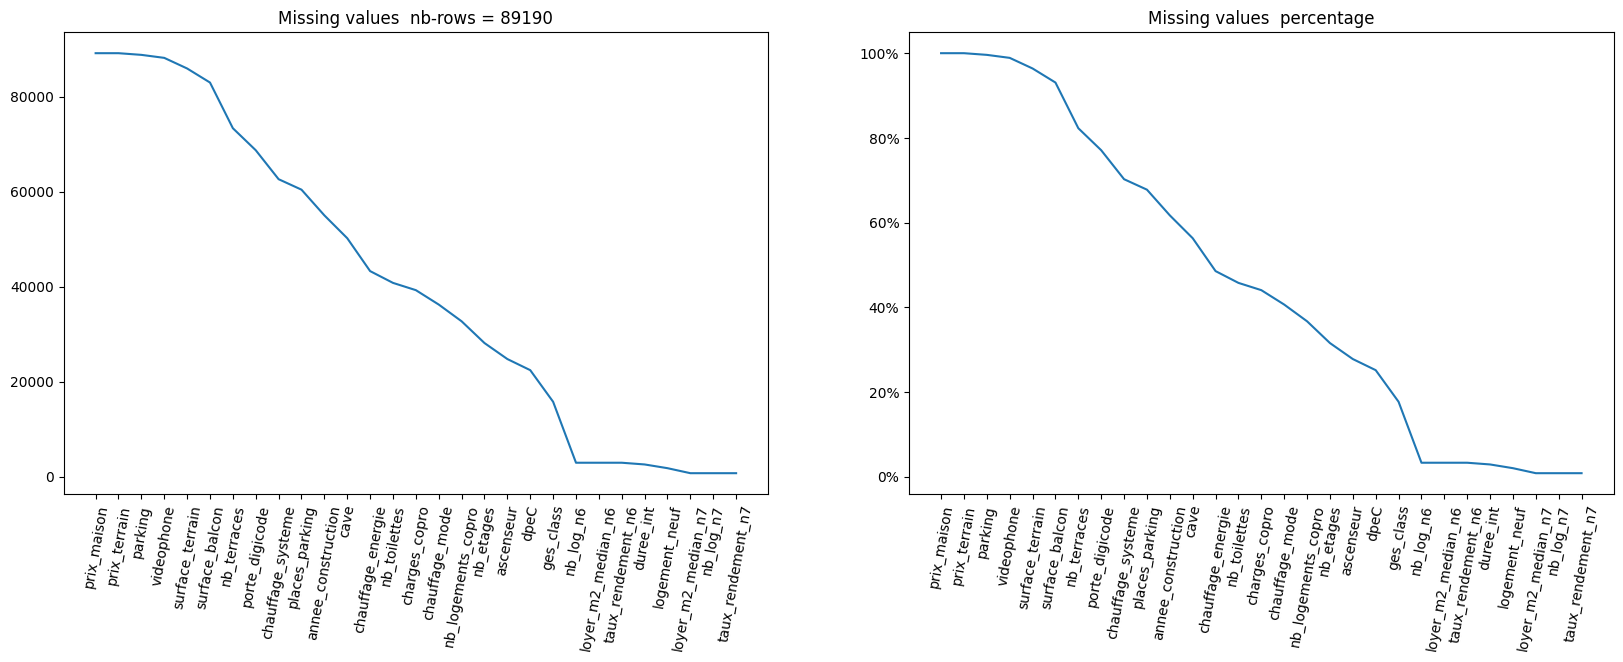

In [6]:
#  stats on Nans
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick

nb_rows= df.shape[0]
nb_cols= df.shape[1]
missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
full_columns = df.columns[ df.isna().any() == False ]
print (f" nb_rows {nb_rows} nb_cols {nb_cols}")
# print(f"columns without Nan values {full_columns.size} / {nb_cols}" )
# print (f"columns without Nans {full_columns}")
# print (missing_values)
plt.figure(figsize=(20,6))
plt.subplot(121)
plt.plot (missing_values.index,missing_values.values)
plt.xticks(rotation=80)
plt.title(f"Missing values  nb-rows = {nb_rows}")
ax2 = plt.subplot(122)
missing_values_percent = (missing_values/nb_rows)*100.0
plt.plot (missing_values_percent.index,missing_values_percent.values)
plt.xticks(rotation=80)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(100)) 
plt.title(f"Missing values  percentage")
plt.show()



59
columns without Nan values 30 / 59


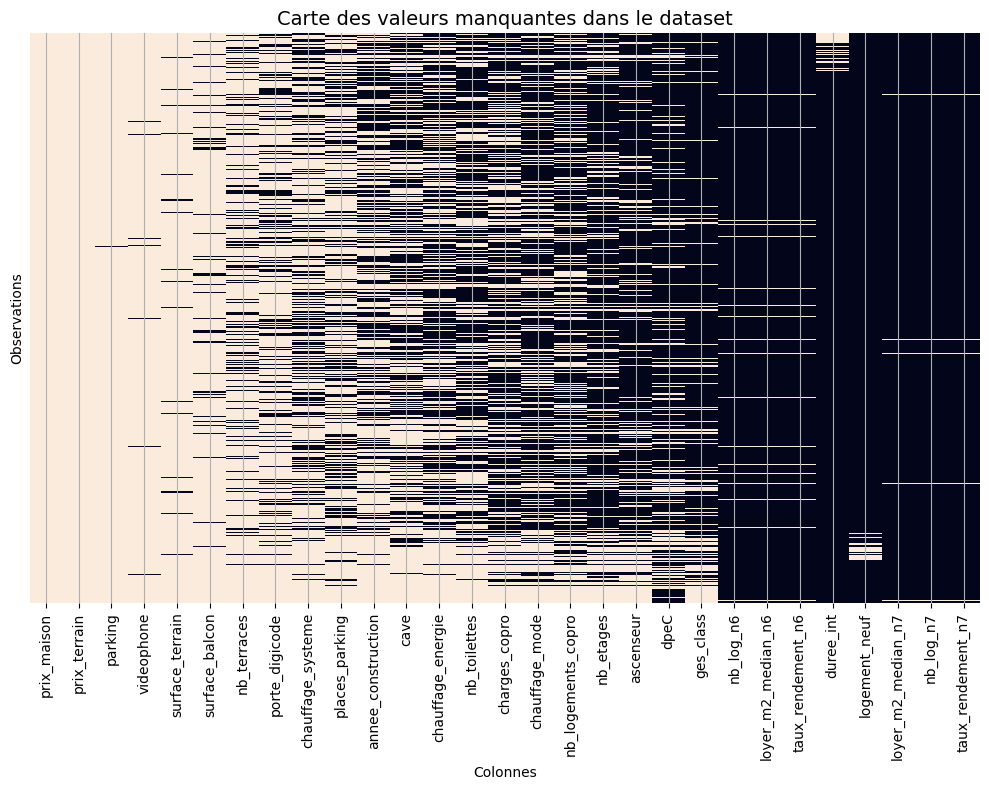

In [7]:
# Visualisation: Heatmap des valeurs manquantes
nb_rows= df.shape[0]
nb_cols= df.shape[1]
missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
full_columns = df.columns[ df.isna().any() == False ]
print (nb_cols)
print(f"columns without Nan values {full_columns.size} / {nb_cols}" )

plt.figure(figsize=(10, 8))
sns.heatmap(df[missing_values.index].isna(), 
            cbar=False,
            yticklabels=False)
plt.title("Carte des valeurs manquantes dans le dataset", fontsize=14)
plt.xlabel("Colonnes")
plt.ylabel("Observations")
plt.tight_layout()
plt.grid(True)
plt.show()



In [8]:
# # drop empty columns : columns with more that 90 % of null values
print (df.shape)
threshold = 0.9
threshold = int(nb_rows*threshold)
empty_cols = []
for name,_ in df.items() :
    if df[name].isna().sum() > threshold :
        empty_cols.append(name) 
print (f"empty cols to remove  {empty_cols}")
# remove empty cols
df = df.drop(columns=empty_cols)

print(f"columns after processing {df.columns.size} / {nb_cols}" )
display(df.head(10))

(89190, 59)
empty cols to remove  ['surface_terrain', 'prix_maison', 'prix_terrain', 'parking', 'videophone', 'surface_balcon']
columns after processing 53 / 59


idannonce type_annonceur typedebien  \
6               hektor-1_flandin-2987             pr          a   
9                immo-facile-47259141             pr          a   
16           century-21-202_772_22211             pr          a   
22               immo-facile-57921203             pr          a   
35                    gedeon-30714757             pr          a   
36                 megagence-1-180671             pr          a   
37               immo-facile-57907113             pr          a   
38               immo-facile-57907100             pr          a   
39                    gedeon-30649235             pr          a   
51  hektor-IMMOBILIEREDESALVAGNY-6767             pr          a   

   typedetransaction  etage  surface  nb_pieces  prix_bien  mensualiteFinance  \
6                  v      1       85          4     347000                  0   
9                  v      1       45          2     168000                  0   
16                 v      1      110          5     249000                  0   
22                 v      0       62          2     179000                  0   
35                 v      0      114          5     795000                  0   
36                 v      2       35          1     110000                  0   
37                 v      0      102          4     554000                  0   
38                 v      3       88          4     650000                  0   
39                 v      1       88          4     329000                  0   
51                 v      1       81          3     575000                  0   

    balcon  ...  UU2010  REG DEP  loyer_m2_median_n6  nb_log_n6  \
6        1  ...     758   84  69               12.33       23.0   
9        0  ...     758   84  69               16.42       15.0   
16       0  ...   69202   84  69               10.96        2.0   
22       0  ...     758   84  69               19.69        2.0   
35       0  ...     758   84  69               12.14        5.0   
36       0  ...     758   84  69               19.24       24.0   
37       0  ...     758   84  69               14.98       15.0   
38       0  ...     758   84  69               14.98       15.0   
39       0  ...     758   84  69               14.98       15.0   
51       2  ...     758   84  69               13.77       55.0   

    taux_rendement_n6 loyer_m2_median_n7  nb_log_n7  taux_rendement_n7  \
6               0.036              12.33       23.0              0.036   
9               0.053              16.42       15.0              0.053   
16              0.058              10.96        2.0              0.058   
22              0.082              15.32       22.0              0.064   
35              0.021              12.14        5.0              0.021   
36              0.073              19.24       24.0              0.073   
37              0.033              14.98       15.0              0.033   
38              0.024              14.98       15.0              0.024   
39              0.048              14.98       15.0              0.048   
51              0.023              13.77       55.0              0.023   

   prix_m2_vente  
6        4082.35  
9        3733.33  
16       2263.64  
22       2887.10  
35       6973.68  
36       3142.86  
37       5431.37  
38       7386.36  
39       3738.64  
51       7098.77  

[10 rows x 53 columns]

In [9]:
# display unique values for categorial columns for analysis

columns_categorial = df.select_dtypes(include="object").columns.tolist()
for column in columns_categorial:
    print(f"{column}: {df[column].unique()}")
# # columns = ["type_annonceur","typedebien_lite",'duree_int']
# # df = df.drop(columns=columns)
# # print(f"columns after processing {df.columns.size} / {nb_cols}" )

idannonce: ['hektor-1_flandin-2987' 'immo-facile-47259141' 'century-21-202_772_22211'
 ... '125133261' '143623871' '139314305']
type_annonceur: ['pr']
typedebien: ['a']
typedetransaction: ['v' 'vp' 'pi']
dpeL: ['D' 'C' 'F' 'E' 'A' 'G' 'B' '0' 'NS' 'VI' 'D - 231 kWh/m².year' 'Blank'
 'D-218 kWh/m².year']
annonce_exclusive: ['Oui' 'Non' '0']
cave: [False nan True]
exposition: ['Est-Ouest' 'Est' '0' 'SO' 'Sud-Ouest' 'Nord-Sud' 'Sud' 'traversant'
 'Nord' 'Nord-Ouest' 'Ouest' 'Nord-Est' 'Sud-Est' 'sud-ouest' 'sud-est'
 'N' 'traversant nord-sud' 'Nord Sud Est' 'EST' 'Nord Sud Ouest'
 'Nord Est Ouest' 'Sud-Est-Ouest' 'Nord-est' 'NS' 'Traversant-Est-Ouest'
 'NE' 'nord-est / sud-ouest' 'EST OUEST' 'NORD SUD' 'Nord-ouest'
 'Ouest - Sud - Est' 'NO' 'Nord Sud Est Ouest' 'Nord, Ouest'
 'nord-ouest / sud-est' 'OUEST' 'Sud et Ouest' 'NORD OUEST' 'sud ouest'
 'SUD' 'SUD OUEST' 'Est Sud' 'Sud Ouest Nord' 'SUD NORD' 'SUD EST'
 'EST/SUD/OUEST' 'Sud/Ouest' 'Sud/Est' 'Est, Ouest' 'EST - OUEST'
 'Sud-Ouest 

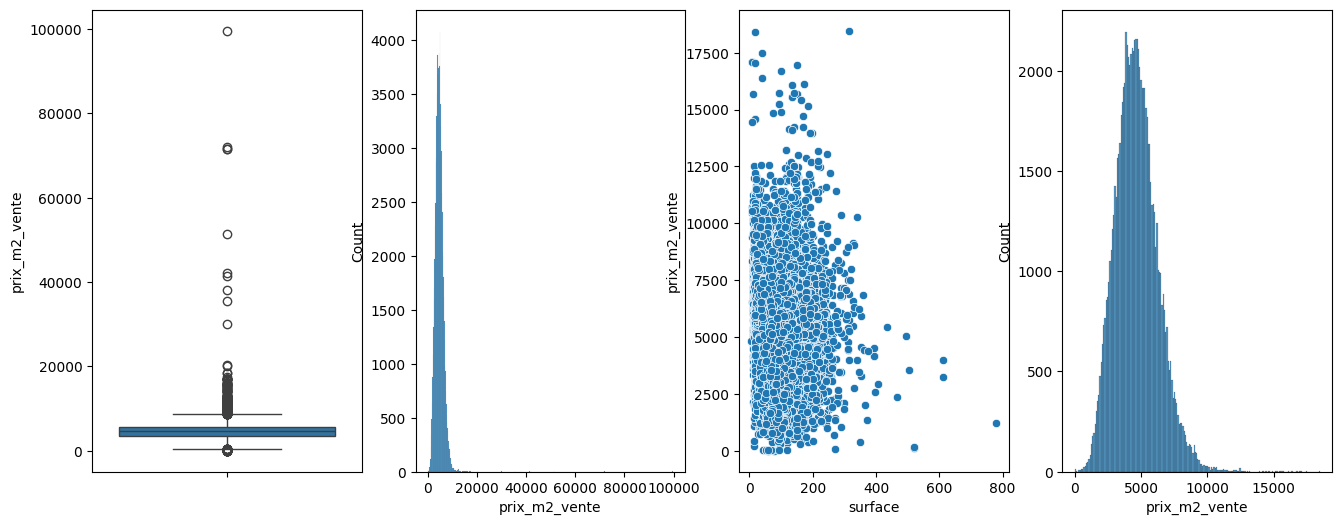

In [10]:
#  analyze prix de vente , chop at 20000
plt.figure(figsize=(16,6))
plt.subplot(141)
sns.boxplot(df['prix_m2_vente'])
plt.subplot(142)
sns.histplot(df['prix_m2_vente'])
plt.subplot(143)
df = df [df['prix_m2_vente'] <20000].reset_index(drop=True)

sns.scatterplot (df,x="surface",y="prix_m2_vente")
plt.subplot(144)
sns.histplot(df['prix_m2_vente'])
plt.show()


Nombre de catégories idannonce : 89178
Nombre de catégories type_annonceur : 1
Nombre de catégories typedebien : 1
Nombre de catégories typedetransaction : 3
Nombre de catégories dpeL : 13
Nombre de catégories annonce_exclusive : 3
Nombre de catégories cave : 2
Nombre de catégories exposition : 127
Nombre de catégories ges_class : 12
Nombre de catégories porte_digicode : 2
Nombre de catégories ascenseur : 2
Nombre de catégories chauffage_energie : 10
Nombre de catégories chauffage_systeme : 23
Nombre de catégories chauffage_mode : 6
Nombre de catégories categorie_annonceur : 5
Nombre de catégories logement_neuf : 2
Nombre de catégories typedebien_lite : 1
Nombre de catégories date : 73
Nombre de catégories TYP_IRIS_x : 4
Nombre de catégories TYP_IRIS_y : 4
catégories idannonce : ['hektor-1_flandin-2987' 'immo-facile-47259141' 'century-21-202_772_22211'
 ... '125133261' '143623871' '139314305']
catégories type_annonceur : ['pr']
catégories typedebien : ['a']
catégories typedetransaction

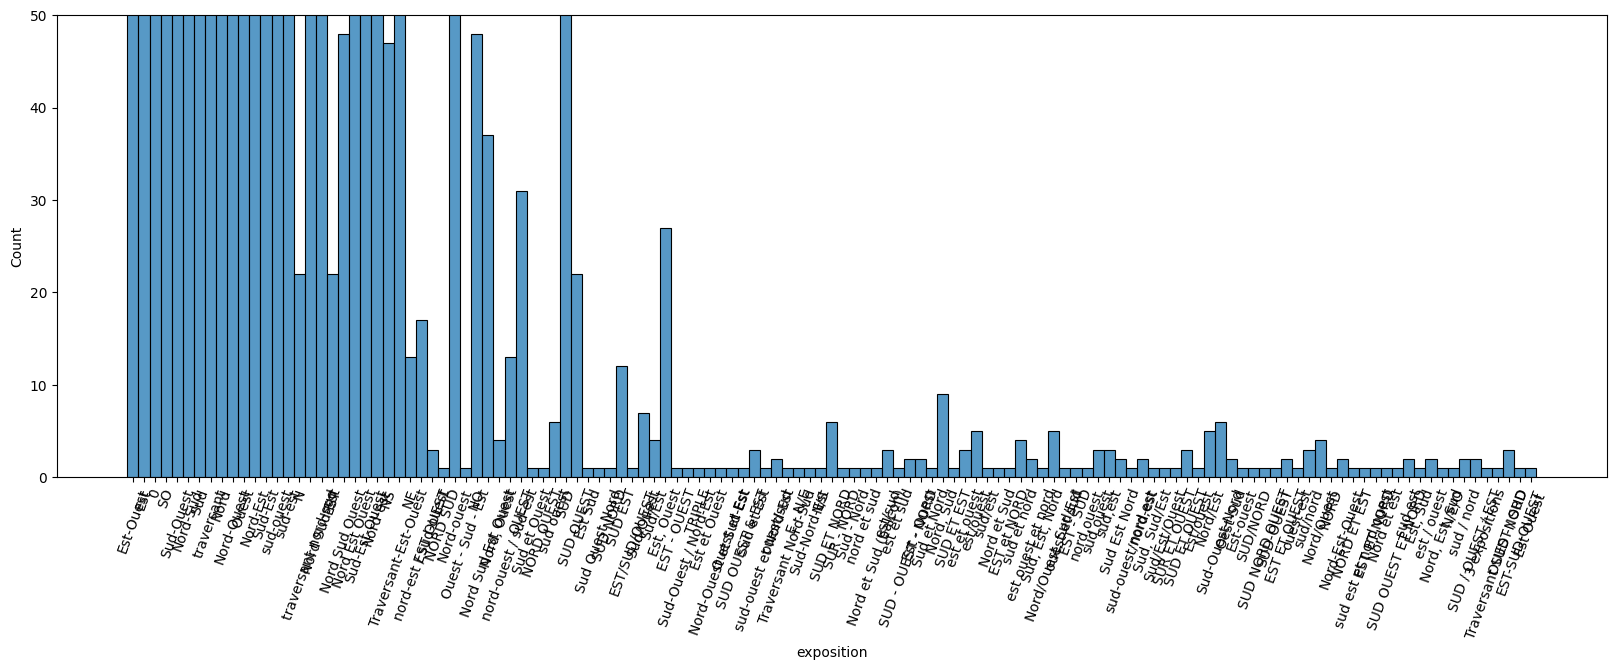

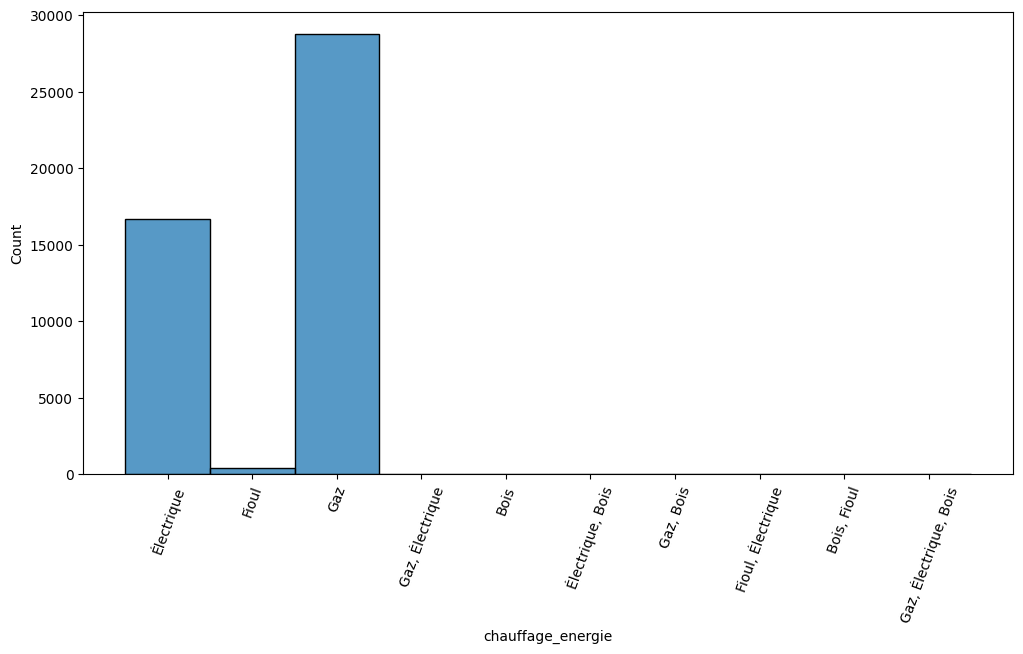

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Individuel'),
  Text(1, 0, 'Collectif'),
  Text(2, 0, 'Collectif, Central'),
  Text(3, 0, 'Individuel, Central'),
  Text(4, 0, 'Central'),
  Text(5, 0, 'Collectif, Individuel')])

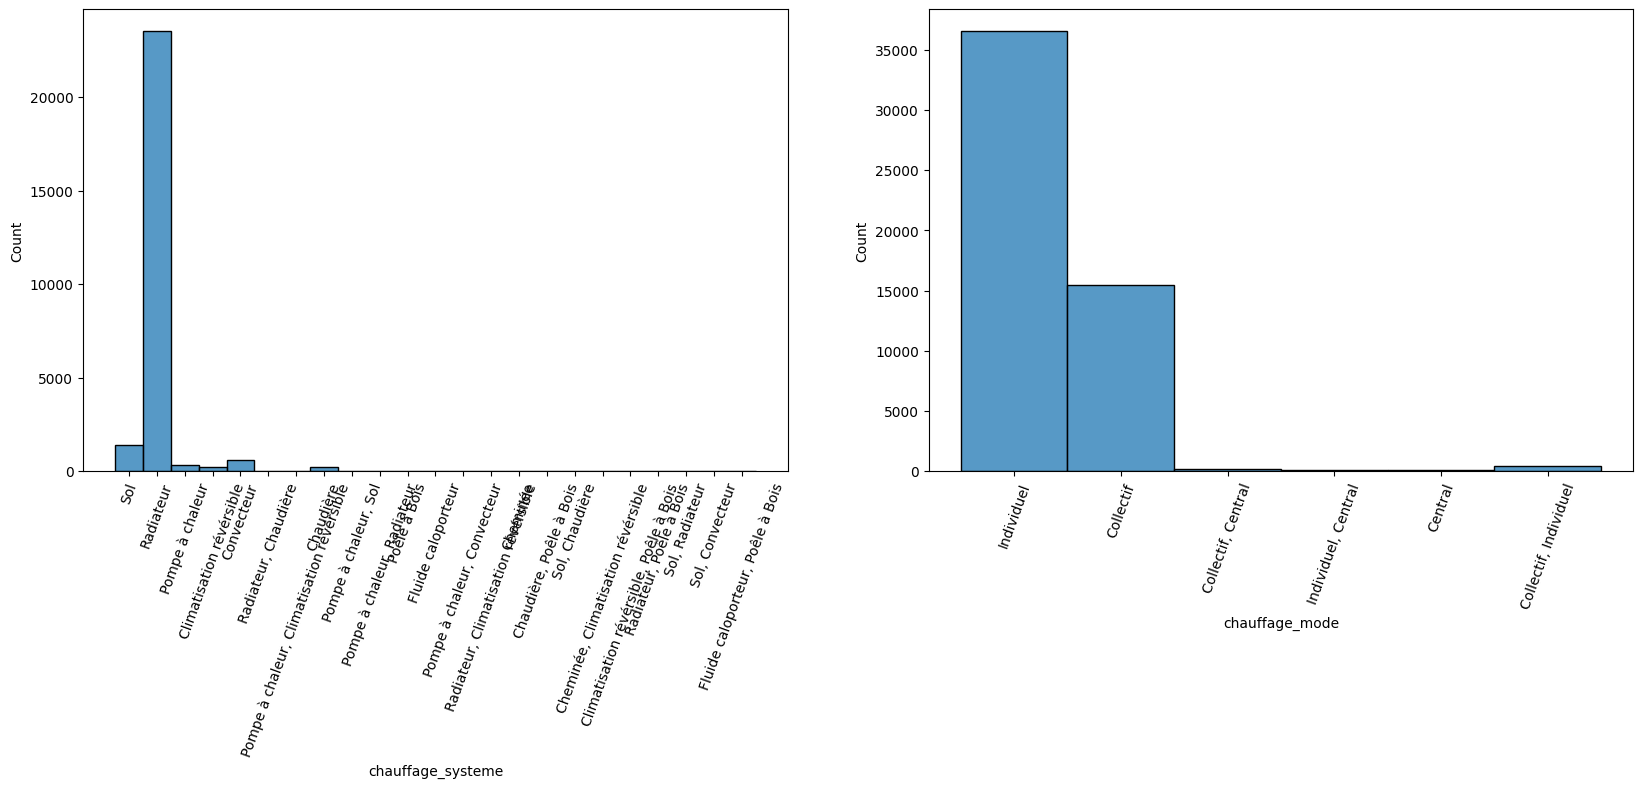

In [11]:
#  view number of values for categorial data
for col in df.select_dtypes('O'):
    print(f'Nombre de catégories {col} : {df[col].nunique()}')

for col in df.select_dtypes('O'):
    print(f'catégories {col} : {df[col].unique()}')

plt.figure(figsize=(20,6))
sns.histplot(df['exposition'])
plt.xticks(rotation=70)
plt.ylim(0,50)
plt.show()
plt.figure(figsize=(12,6))
sns.histplot(df['chauffage_energie'])
plt.xticks(rotation=70)
plt.show()
plt.figure(figsize=(20,6))
plt.subplot(121)
sns.histplot(df['chauffage_systeme'])
plt.xticks(rotation=70)
plt.subplot(122)
sns.histplot(df['chauffage_mode'])
plt.xticks(rotation=70)

<Axes: >

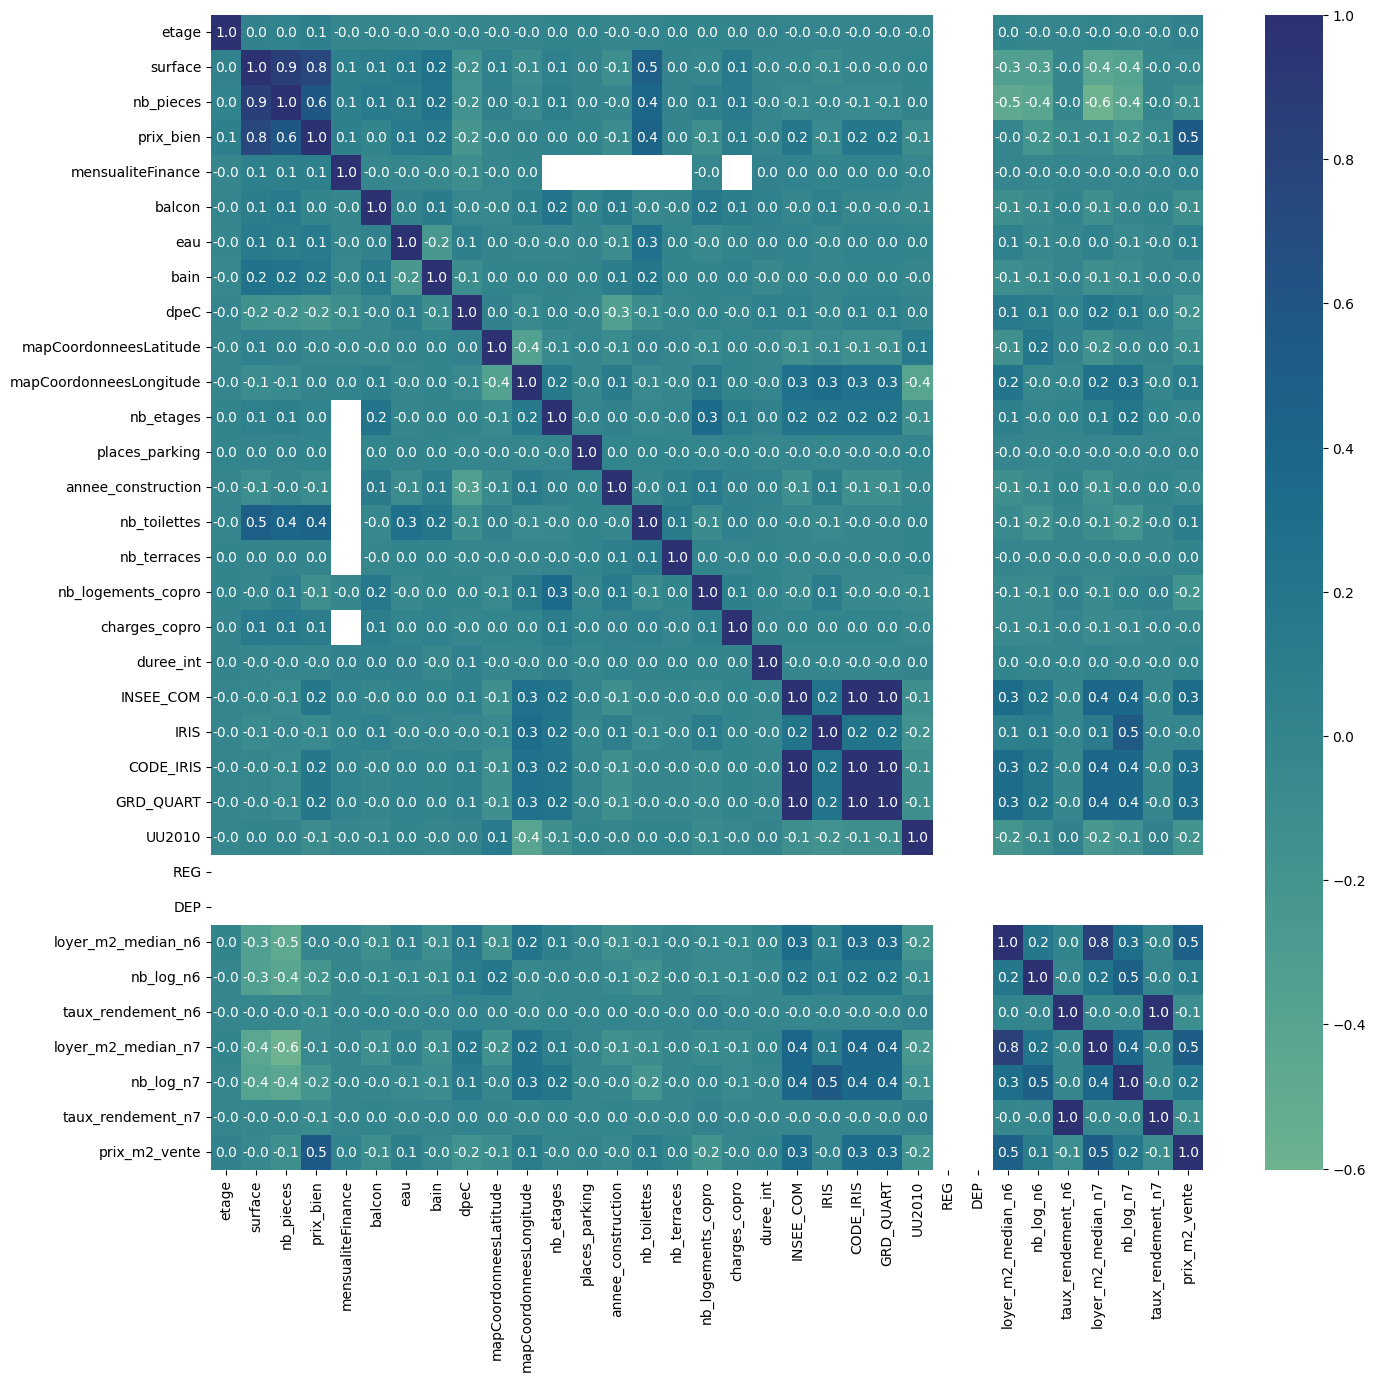

In [9]:
df1 = df.select_dtypes(exclude = ['object'])
plt.figure(figsize=(16,15))
sns.heatmap(df1.corr(),annot=True, cmap="crest", center =0,fmt=".1f")


In [10]:
# sns.pairplot(data=df)

['Individuel' nan 'Collectif' 'Collectif, Central' 'Individuel, Central'
 'Central' 'Collectif, Individuel']
36260
chauffage_mode
Individuel               36516
unknown                  36260
Collectif                15446
Collectif, Individuel      481
Collectif, Central         223
Individuel, Central        132
Central                    120
Name: count, dtype: int64
chauffage_mode
Individuel    37129
unknown       36260
Collectif     15789
Name: count, dtype: int64


<Axes: xlabel='chauffage_mode', ylabel='Count'>

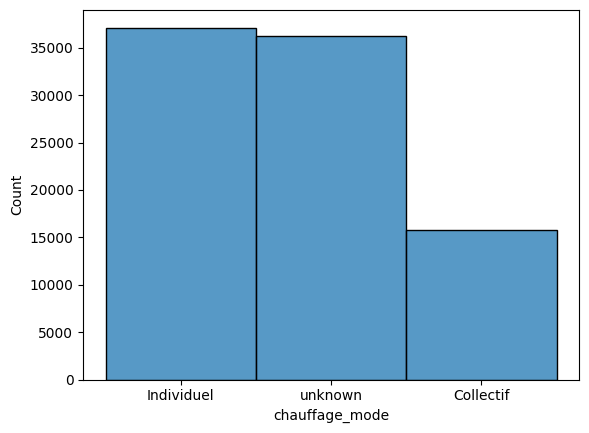

In [12]:
#simplfy chauffage mode, 50% isna
print(df["chauffage_mode"].unique())
print(df["chauffage_mode"].isna().sum())
df["chauffage_mode"] = df["chauffage_mode"].fillna("unknown")
print(df["chauffage_mode"].value_counts())
df["chauffage_mode"] = df["chauffage_mode"].apply(lambda x : "Individuel"  if "Individuel" in x else x)
df["chauffage_mode"] = df["chauffage_mode"].apply(lambda x : "Collectif"  if "Central" in x else x)
print(df["chauffage_mode"].value_counts())

sns.histplot(df["chauffage_mode"])


['Électrique' 'Fioul' 'Gaz' nan 'Gaz, Électrique' 'Bois'
 'Électrique, Bois' 'Gaz, Bois' 'Fioul, Électrique' 'Bois, Fioul'
 'Gaz, Électrique, Bois']
43303
chauffage_energie
unknown                  43303
Gaz                      28738
Électrique               16657
Fioul                      386
Bois                        31
Gaz, Électrique             29
Électrique, Bois            16
Gaz, Bois                   15
Fioul, Électrique            1
Bois, Fioul                  1
Gaz, Électrique, Bois        1
Name: count, dtype: int64
chauffage_energie
unknown              43303
Gaz                  28783
Elec                 16657
Fioul                  386
Bois                    31
Électrique, Bois        16
Fioul, Électrique        1
Bois, Fioul              1
Name: count, dtype: int64


<Axes: xlabel='chauffage_energie', ylabel='Count'>

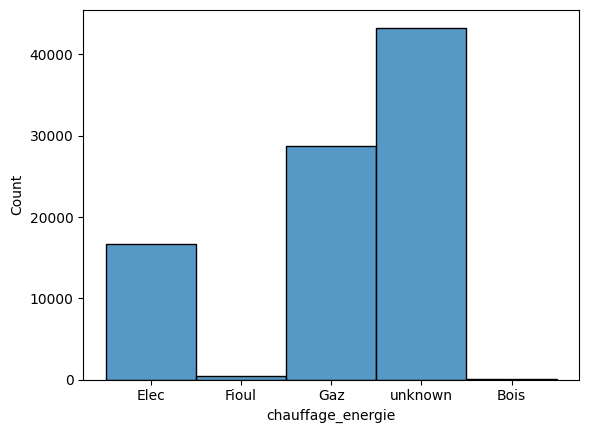

In [13]:
#simplify chauffage energie
print(df["chauffage_energie"].unique())
print(df["chauffage_energie"].isna().sum())
df["chauffage_energie"] = df["chauffage_energie"].fillna("unknown")
print(df["chauffage_energie"].value_counts())
df["chauffage_energie"] = df["chauffage_energie"].replace(to_replace=["Électrique"],value=["Elec"])
df["chauffage_energie"] = df["chauffage_energie"].apply(lambda x : "Gaz"  if "Gaz" in x else x)
print(df["chauffage_energie"].value_counts())
df["chauffage_energie"] = df["chauffage_energie"].replace(to_replace=["Bois, Fioul","Électrique, Bois","Fioul, Électrique"],value=["Bois","Elec","Fioul"])

sns.histplot(df["chauffage_energie"])

['D' 'C' 'F' 'E' 'A' 'G' 'B' '0' 'NS' 'VI' 'D - 231 kWh/m².year' 'Blank'
 'D-218 kWh/m².year']
0
dpeL
D                      24876
C                      16927
E                      11527
B                       8843
0                       7980
NS                      7708
VI                      5352
F                       2702
A                       2123
G                       1136
Blank                      2
D - 231 kWh/m².year        1
D-218 kWh/m².year          1
Name: count, dtype: int64
dpeL
D          24878
C          16927
E          11527
B           8843
0           7980
NS          7708
VI          5352
F           2702
A           2123
G           1136
Unknown        2
Name: count, dtype: int64


<Axes: xlabel='dpeL', ylabel='Count'>

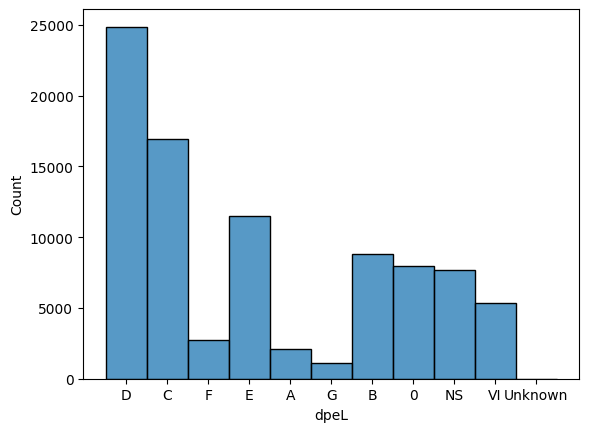

In [14]:
print(df["dpeL"].unique())
print(df["dpeL"].isna().sum())
print(df["dpeL"].value_counts())
df["dpeL"] = df["dpeL"].replace(to_replace=["D - 231 kWh/m².year","D-218 kWh/m².year","Blank"],value=["D","D","Unknown"])
print(df["dpeL"].value_counts())

sns.histplot(df["dpeL"])


15797
ges_class
B          17802
C          15828
U          15797
D          14701
E           7738
A           6819
VI          5452
NS          2284
F           1778
G            977
Unknown        2
Name: count, dtype: int64


<Axes: xlabel='ges_class', ylabel='Count'>

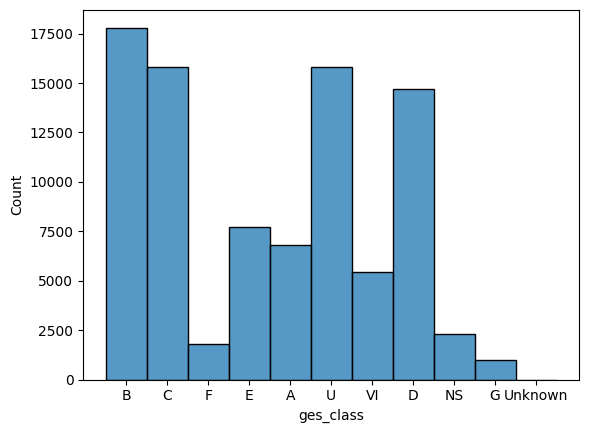

In [15]:
# gaz a effet de serre : set to unknown
print(df["ges_class"].isna().sum())
df["ges_class"] = df["ges_class"].fillna("U")
df["ges_class"] = df["ges_class"].replace(to_replace=["D - 49 kg CO2/m².year","E-41 kg CO2/m².year","Blank"],value=["D","E","Unknown"])
print(df["ges_class"].value_counts())

sns.histplot(df["ges_class"])


101
['est' 'Unknown' 'sud' 'nord' 'ouest']


<Axes: xlabel='exposition', ylabel='Count'>

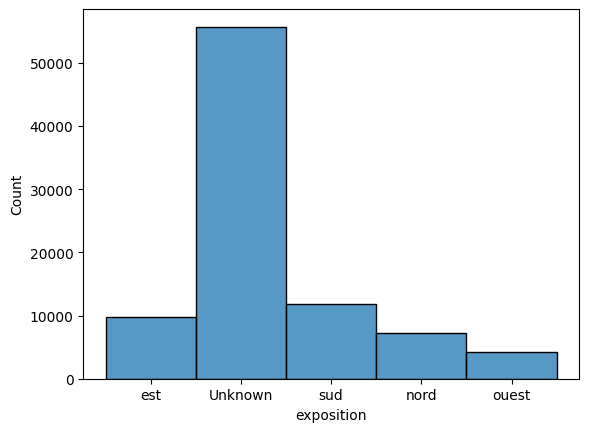

In [16]:
# refactor exposition
df['exposition'] = df['exposition'].str.lower()
print(df["exposition"].unique().size)
df['exposition'] = df['exposition'].replace(to_replace=[" / ","/"," - "," -"," et ",", "," ,",","],value=["-","-","-","-","-","-","-","-"],regex=True)
df['exposition'] = df['exposition'].replace(to_replace=["ne","so","n","ns","n-s","n-e-o"],value=["nord-est","sud-ouest","nord","nord-sud","nord-sud","nord-est-ouest"])

df['exposition'] = df['exposition'].replace(to_replace=["no","e-n-e","est-ouest-"],value=["nord-ouest","est-nord-est","est-ouest"])
df['exposition'] = df['exposition'].replace(to_replace=["nord-sud-(balcon)","sud-ouest-&-est","traversant-"],value=["","sud-ouest-est",""])
df['exposition'] = df['exposition'].replace(to_replace=["oest","sur","traversant"],value=["ouest","sud",""],regex=True)
# df['exposition'] = df['exposition'].replace(to_replace=[" "],value=["-"],regex=True)
df['exposition'] = df['exposition'].replace(to_replace=["-est-ouest","-sud-nord","-nord-sud"," nord-sud"," sud-nord"],value=["est-ouest","sud-nord","nord-sud","nord-sud","sud-nord"])

df["exposition"] = df["exposition"].replace(to_replace=["0"],value=["Unknown"])
df["exposition"] = df["exposition"].apply(lambda x : "nord" if x.startswith('nord') else x)
df["exposition"] = df["exposition"].apply(lambda x : "sud" if x.startswith('sud') else x)
df["exposition"] = df["exposition"].apply(lambda x : "est" if x.startswith('est') else x)
# df["exposition"] = df["exposition"].apply(lambda x : "est" if x.startswith('-est') else x)
df["exposition"] = df["exposition"].apply(lambda x : "ouest" if x.startswith('ouest') else x)

df = df [df['exposition'] != "triple"].reset_index(drop=True)
df = df [df['exposition'] != "3 expositions"].reset_index(drop=True)
df = df [df['exposition'] != ""].reset_index(drop=True)

print(df["exposition"].unique())

sns.histplot(df["exposition"])



['Sol' 'Radiateur' nan 'Pompe à chaleur' 'Climatisation révérsible'
 'Convecteur' 'Radiateur, Chaudière'
 'Pompe à chaleur, Climatisation révérsible' 'Chaudière'
 'Pompe à chaleur, Sol' 'Pompe à chaleur, Radiateur' 'Poêle à Bois'
 'Fluide caloporteur' 'Pompe à chaleur, Convecteur'
 'Radiateur, Climatisation révérsible' 'Cheminée'
 'Chaudière, Poêle à Bois' 'Sol, Chaudière'
 'Cheminée, Climatisation révérsible'
 'Climatisation révérsible, Poêle à Bois' 'Radiateur, Poêle à Bois'
 'Sol, Radiateur' 'Sol, Convecteur' 'Fluide caloporteur, Poêle à Bois']
62276
chauffage_systeme
unknown                     62276
Radiateur                   23568
Sol                          1399
Convecteur                    620
Pompe à chaleur               432
Climatisation révérsible      254
Chaudière                     214
Poêle à Bois                   26
Cheminée                        6
Name: count, dtype: int64


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Sol'),
  Text(1, 0, 'Radiateur'),
  Text(2, 0, 'unknown'),
  Text(3, 0, 'Pompe à chaleur'),
  Text(4, 0, 'Climatisation révérsible'),
  Text(5, 0, 'Convecteur'),
  Text(6, 0, 'Chaudière'),
  Text(7, 0, 'Poêle à Bois'),
  Text(8, 0, 'Cheminée')])

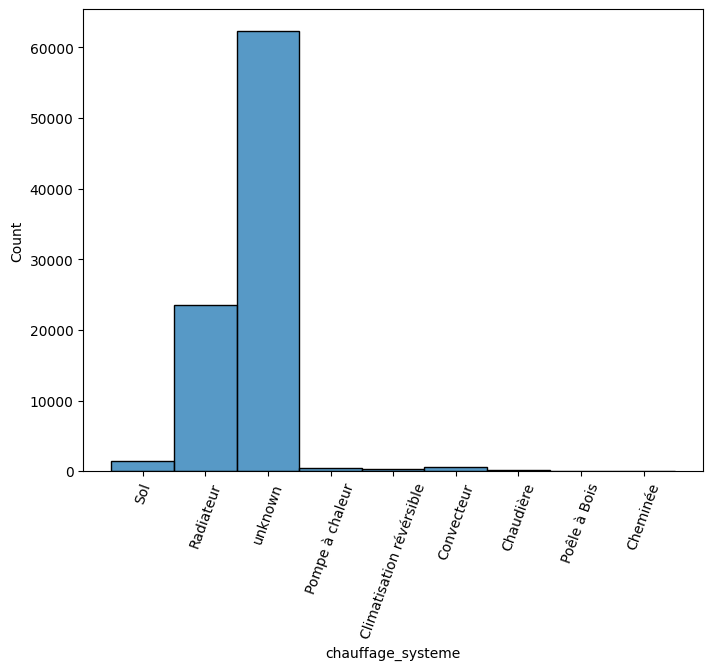

In [16]:
print(df["chauffage_systeme"].unique())
print(df["chauffage_systeme"].isna().sum())
df["chauffage_systeme"] = df["chauffage_systeme"].fillna("unknown")
names = ["Climatisation révérsible","Pompe à chaleur","Convecteur","Radiateur","Chaudière"]
for name in names : 
    df["chauffage_systeme"] = df["chauffage_systeme"].apply(lambda x : name if name in x else x)
name = "Fluide caloporteur"
df["chauffage_systeme"] = df["chauffage_systeme"].apply(lambda x : "Pompe à chaleur" if name in x else x)
print(df["chauffage_systeme"].value_counts())

plt.figure(figsize=(8,6))
sns.histplot(df["chauffage_systeme"])
plt.xticks(rotation=70)
# df["chauffage_energie"] = df["chauffage_energie"].replace(to_replace=["Électrique"],value=["Elec"])
# df["chauffage_energie"] = df["chauffage_energie"].apply(lambda x : "Gaz"  if "Gaz" in x else x)
# print(df["chauffage_energie"].value_counts())
# df["chauffage_energie"] = df["chauffage_energie"].replace(to_replace=["Bois, Fioul","Électrique, Bois","Fioul, Électrique"],value=["Bois","Elec","Fioul"])


<class 'pandas.core.indexes.base.Index'>


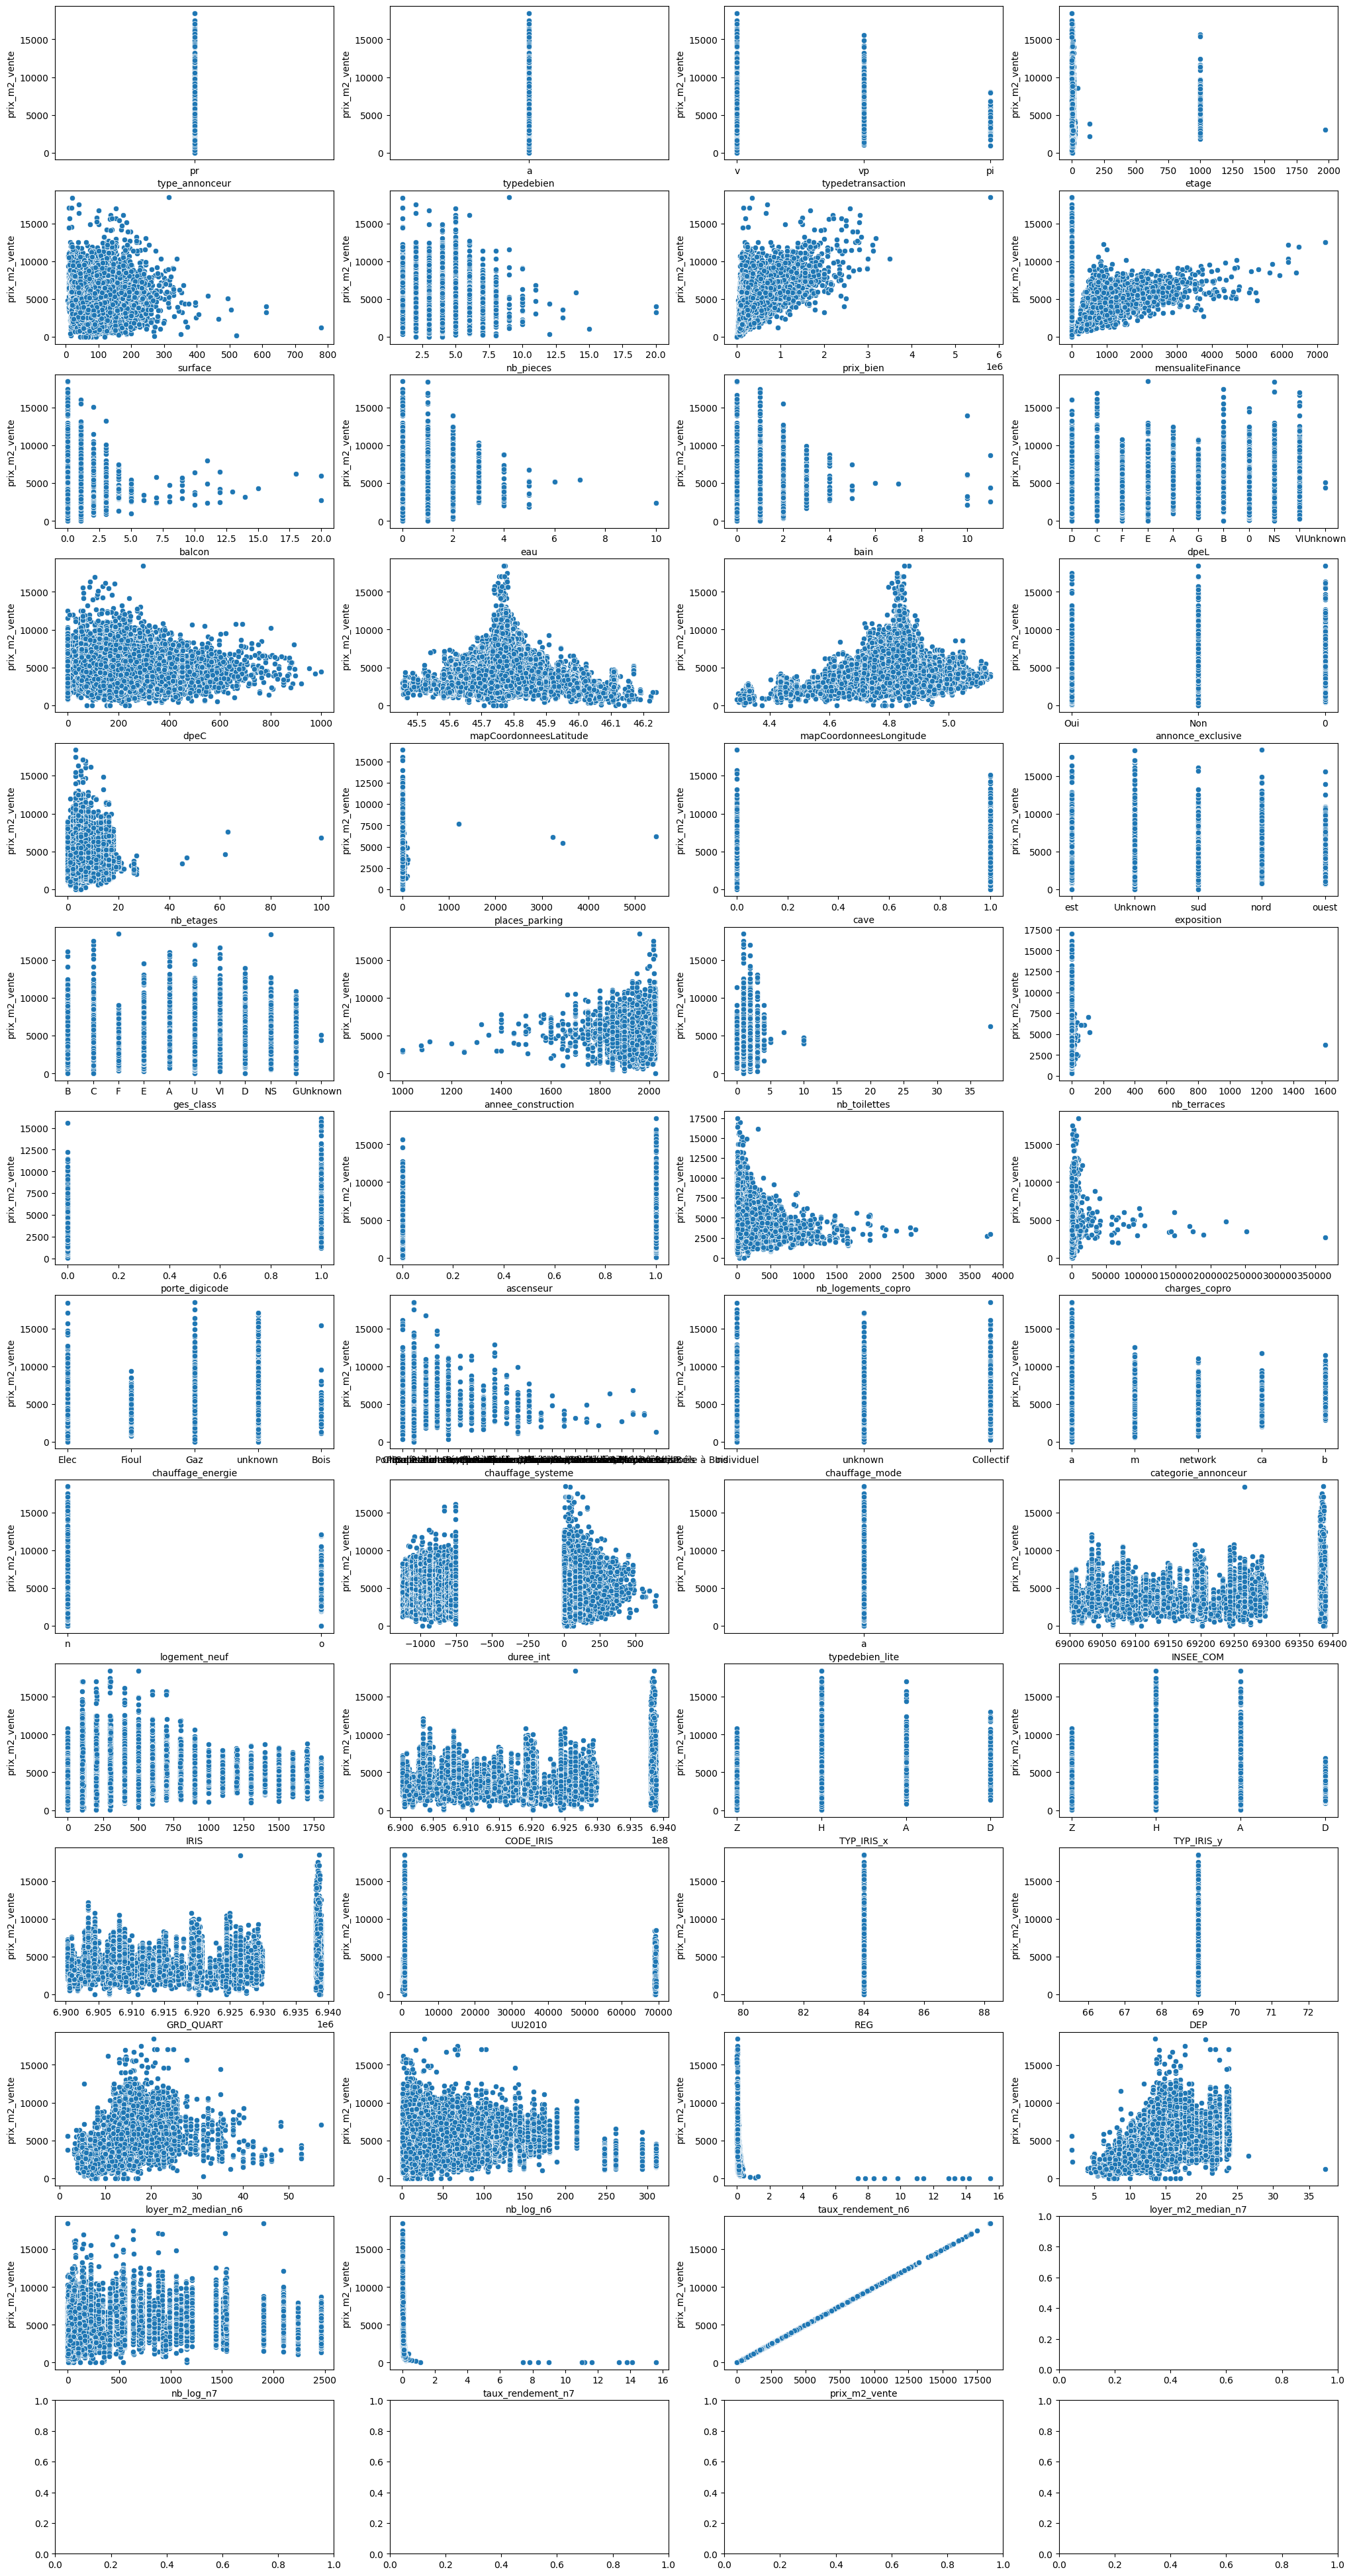

In [ ]:
#  scatter plot of each column / prix_m2_vente
df.sort_values(by="prix_m2_vente",ascending=True)
columns = df.columns
print (type(columns))
nrows = int(columns.size/4) +1
fig , axes = plt.subplots(nrows = nrows, ncols = 4, figsize = (25,50))
index = 0
for column in columns :
    if column not in ["idannonce","date"] :
        sns.scatterplot(ax=axes[int(index/4),index%4],y=df["prix_m2_vente"],x=df[column])
        index = index +1


In [ ]:
import numpy as np

# clean column nb_logements_copro 
df["nb_logements_copro"] = df["nb_logements_copro"].fillna(df["nb_logements_copro"].mean()).astype("int")
df["nb_logements_copro"].unique()

# clean annee construction 
df['annee_construction'] = df['annee_construction'].apply(lambda x : 1600  if x < 1600 else x)
df["annee_construction"].unique()
df["annee_construction"] = df["annee_construction"].fillna(df["annee_construction"].median())
df["annee_construction"] = df["annee_construction"].astype("int")


# places parking , set nan to zero
df["places_parking"] = df["places_parking"].fillna(0)
df["places_parking"] = df["places_parking"].astype("int")
df["places_parking"].unique()
df['places_parking'] = df['places_parking'].apply(lambda x : 125  if x > 125 else x)



#   nb_toilettes set Nan to 1
df["nb_toilettes"] = df["nb_toilettes"].fillna(1).astype(int)
print (df["nb_toilettes"].isna().sum())
df['nb_toilettes'] = df['nb_toilettes'].apply(lambda x : 10  if x > 10 else x)

#   dpec set Nan to 0
df["dpeC"] = df["dpeC"].fillna(0)
print (df["dpeC"].isna().sum())

# nb_etages set Nan to mean value
df["nb_etages"] = df["nb_etages"].fillna(df["nb_etages"].median()).astype(int)

# porte digicode set Nan to False
print (df['porte_digicode'].isna().sum())
df["porte_digicode"] = df["porte_digicode"].fillna(False)

# loyer fillna to zero
attributes = ["loyer_m2_median_n6","nb_log_n6","taux_rendement_n6"]
for attribute in attributes :
    df[attribute]= df[attribute].fillna(0)
    
attributes = ["loyer_m2_median_n7","nb_log_n7","taux_rendement_n7"]
for attribute in attributes :
    df[attribute]= df[attribute].fillna(0)


# surface / remove spurious value
print (df['surface'].max())
print (f" {df['surface'].min()} {df['surface'].max()} ")

#  number of logments copro : limit max
df['nb_logements_copro'] = df['nb_logements_copro'].apply(lambda x : 2500  if x >2500  else x)

# nb_terrace remove surious value
df['nb_terraces'] = df['nb_terraces'].apply(lambda x : df['nb_terraces'].median()  if x >200  else x)
df["nb_terraces"] = df["nb_terraces"].fillna(0)

# cave fillna 0
df["cave"] = df["cave"].fillna(0)

# logement neuf
df["logement_neuf"] = df["logement_neuf"].fillna('u')
print (df["logement_neuf"].unique())

# ascenceur
print (df["ascenseur"].unique())
df["ascenseur"] = df["ascenseur"].fillna(2)
df["ascenseur"] = df["ascenseur"].replace(to_replace=[True,False],value=[1,0]).astype(int)

# ascenceur
print (df["duree_int"].unique())
df["duree_int"] = df["duree_int"].fillna(0)


0
0
68378
[1200.    750.    695.   ... 1188.36 8805.   8318.  ]
364320.0
 0.0 364320.0 
780
 6 780 
['n' 'o' 'u']
[False nan True]
[       nan  8.000e+00  1.400e+01  7.000e+00  2.200e+01  2.000e+01
  2.800e+01  3.500e+01  2.900e+01  1.500e+01  3.600e+01  4.200e+01
  6.400e+01  2.100e+01  5.000e+01  5.700e+01  7.000e+01  6.300e+01
  5.600e+01  4.300e+01  4.900e+01  6.900e+01  5.500e+01  6.000e+00
  7.800e+01  2.300e+01  2.700e+01  3.400e+01  6.500e+01  7.200e+01
  8.400e+01  1.200e+01  9.800e+01  9.100e+01  4.100e+01  7.600e+01
  6.200e+01  5.800e+01  7.100e+01  1.900e+01  2.600e+01  4.800e+01
  7.700e+01  1.700e+01  3.100e+01  3.000e+01  1.140e+02  1.600e+01
  2.400e+01  1.210e+02  3.700e+01  9.200e+01  1.000e+02  1.070e+02
  9.000e+00  8.500e+01  9.300e+01  9.900e+01  4.400e+01  1.200e+02
  1.130e+02  1.270e+02  5.000e+00  3.300e+01  5.200e+01  1.480e+02
  8.600e+01  4.500e+01  1.300e+01  1.280e+02  1.550e+02  5.100e+01
  1.120e+02  1.350e+02  1.190e+02  1.060e+02  4.000e+01  1.260e+0

/tmp/ipykernel_78999/1188534095.py:37: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["porte_digicode"] = df["porte_digicode"].fillna(False)
/tmp/ipykernel_78999/1188534095.py:74: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["ascenseur"] = df["ascenseur"].replace(to_replace=[True,False],value=[1,0]).astype(int)


 0.0 9800.0 


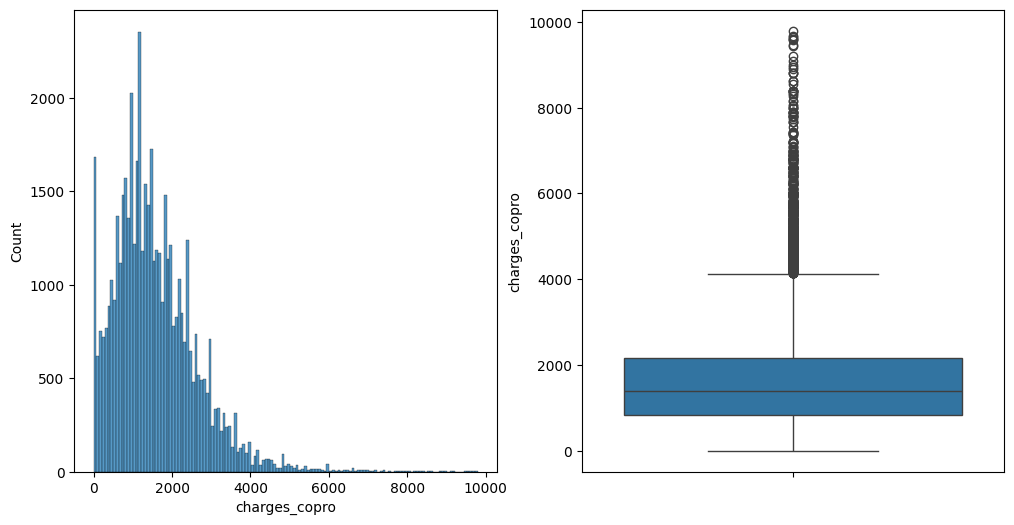

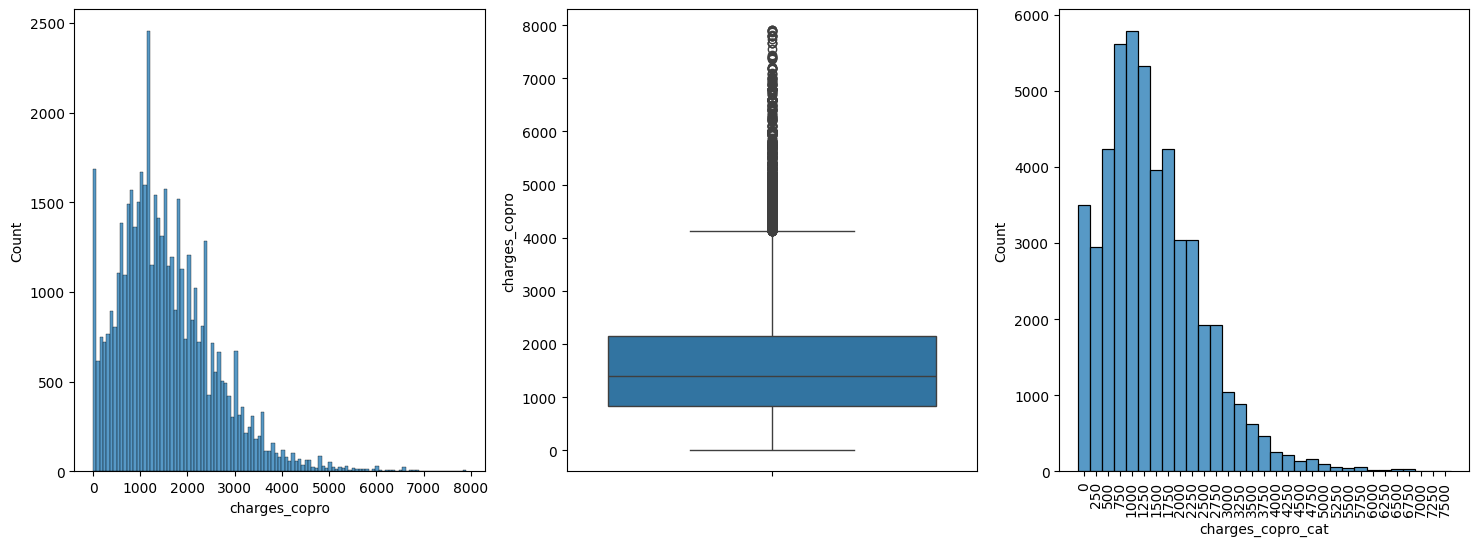

In [43]:
import numpy as np
# charges copro
# charges copro / remove spurious value
# df = df.reindex(sorted(df.columns), axis=1)
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.histplot(df["charges_copro"])
plt.subplot(122)
sns.boxplot(df["charges_copro"])
# print (df["charges_copro"].unique())
print (f" {df['charges_copro'].min()} {df['charges_copro'].max()} ")

plt.show()
max_value = 8000
plt.figure(figsize=(18,6))
df= df [df['charges_copro']< max_value]
plt.subplot(131)
sns.histplot(df["charges_copro"])
plt.subplot(132)
sns.boxplot(df["charges_copro"])
bins = np.arange(0,max_value,250).tolist()
labels = [str(x) for x in bins]
labels.pop()
df['charges_copro_cat']=pd.cut(x = df['charges_copro'],bins=bins,labels=labels,include_lowest = True)
plt.subplot(133)
sns.histplot(df["charges_copro_cat"],bins=250)
plt.xticks(rotation=90)
plt.show()


In [19]:
print (df.isna().sum())

idannonce                      0
type_annonceur                 0
typedebien                     0
typedetransaction              0
etage                          0
surface                        0
nb_pieces                      0
prix_bien                      0
mensualiteFinance              0
balcon                         0
eau                            0
bain                           0
dpeL                           0
dpeC                           0
mapCoordonneesLatitude         0
mapCoordonneesLongitude        0
annonce_exclusive              0
nb_etages                      0
places_parking                 0
cave                           0
exposition                     0
ges_class                      0
annee_construction             0
nb_toilettes                   0
nb_terraces                    0
porte_digicode                 0
ascenseur                      0
nb_logements_copro             0
charges_copro              39202
chauffage_energie              0
chauffage_

In [20]:
df.isna().sum()

idannonce                      0
type_annonceur                 0
typedebien                     0
typedetransaction              0
etage                          0
surface                        0
nb_pieces                      0
prix_bien                      0
mensualiteFinance              0
balcon                         0
eau                            0
bain                           0
dpeL                           0
dpeC                           0
mapCoordonneesLatitude         0
mapCoordonneesLongitude        0
annonce_exclusive              0
nb_etages                      0
places_parking                 0
cave                           0
exposition                     0
ges_class                      0
annee_construction             0
nb_toilettes                   0
nb_terraces                    0
porte_digicode                 0
ascenseur                      0
nb_logements_copro             0
charges_copro              39202
chauffage_energie              0
chauffage_

<class 'pandas.core.indexes.base.Index'>


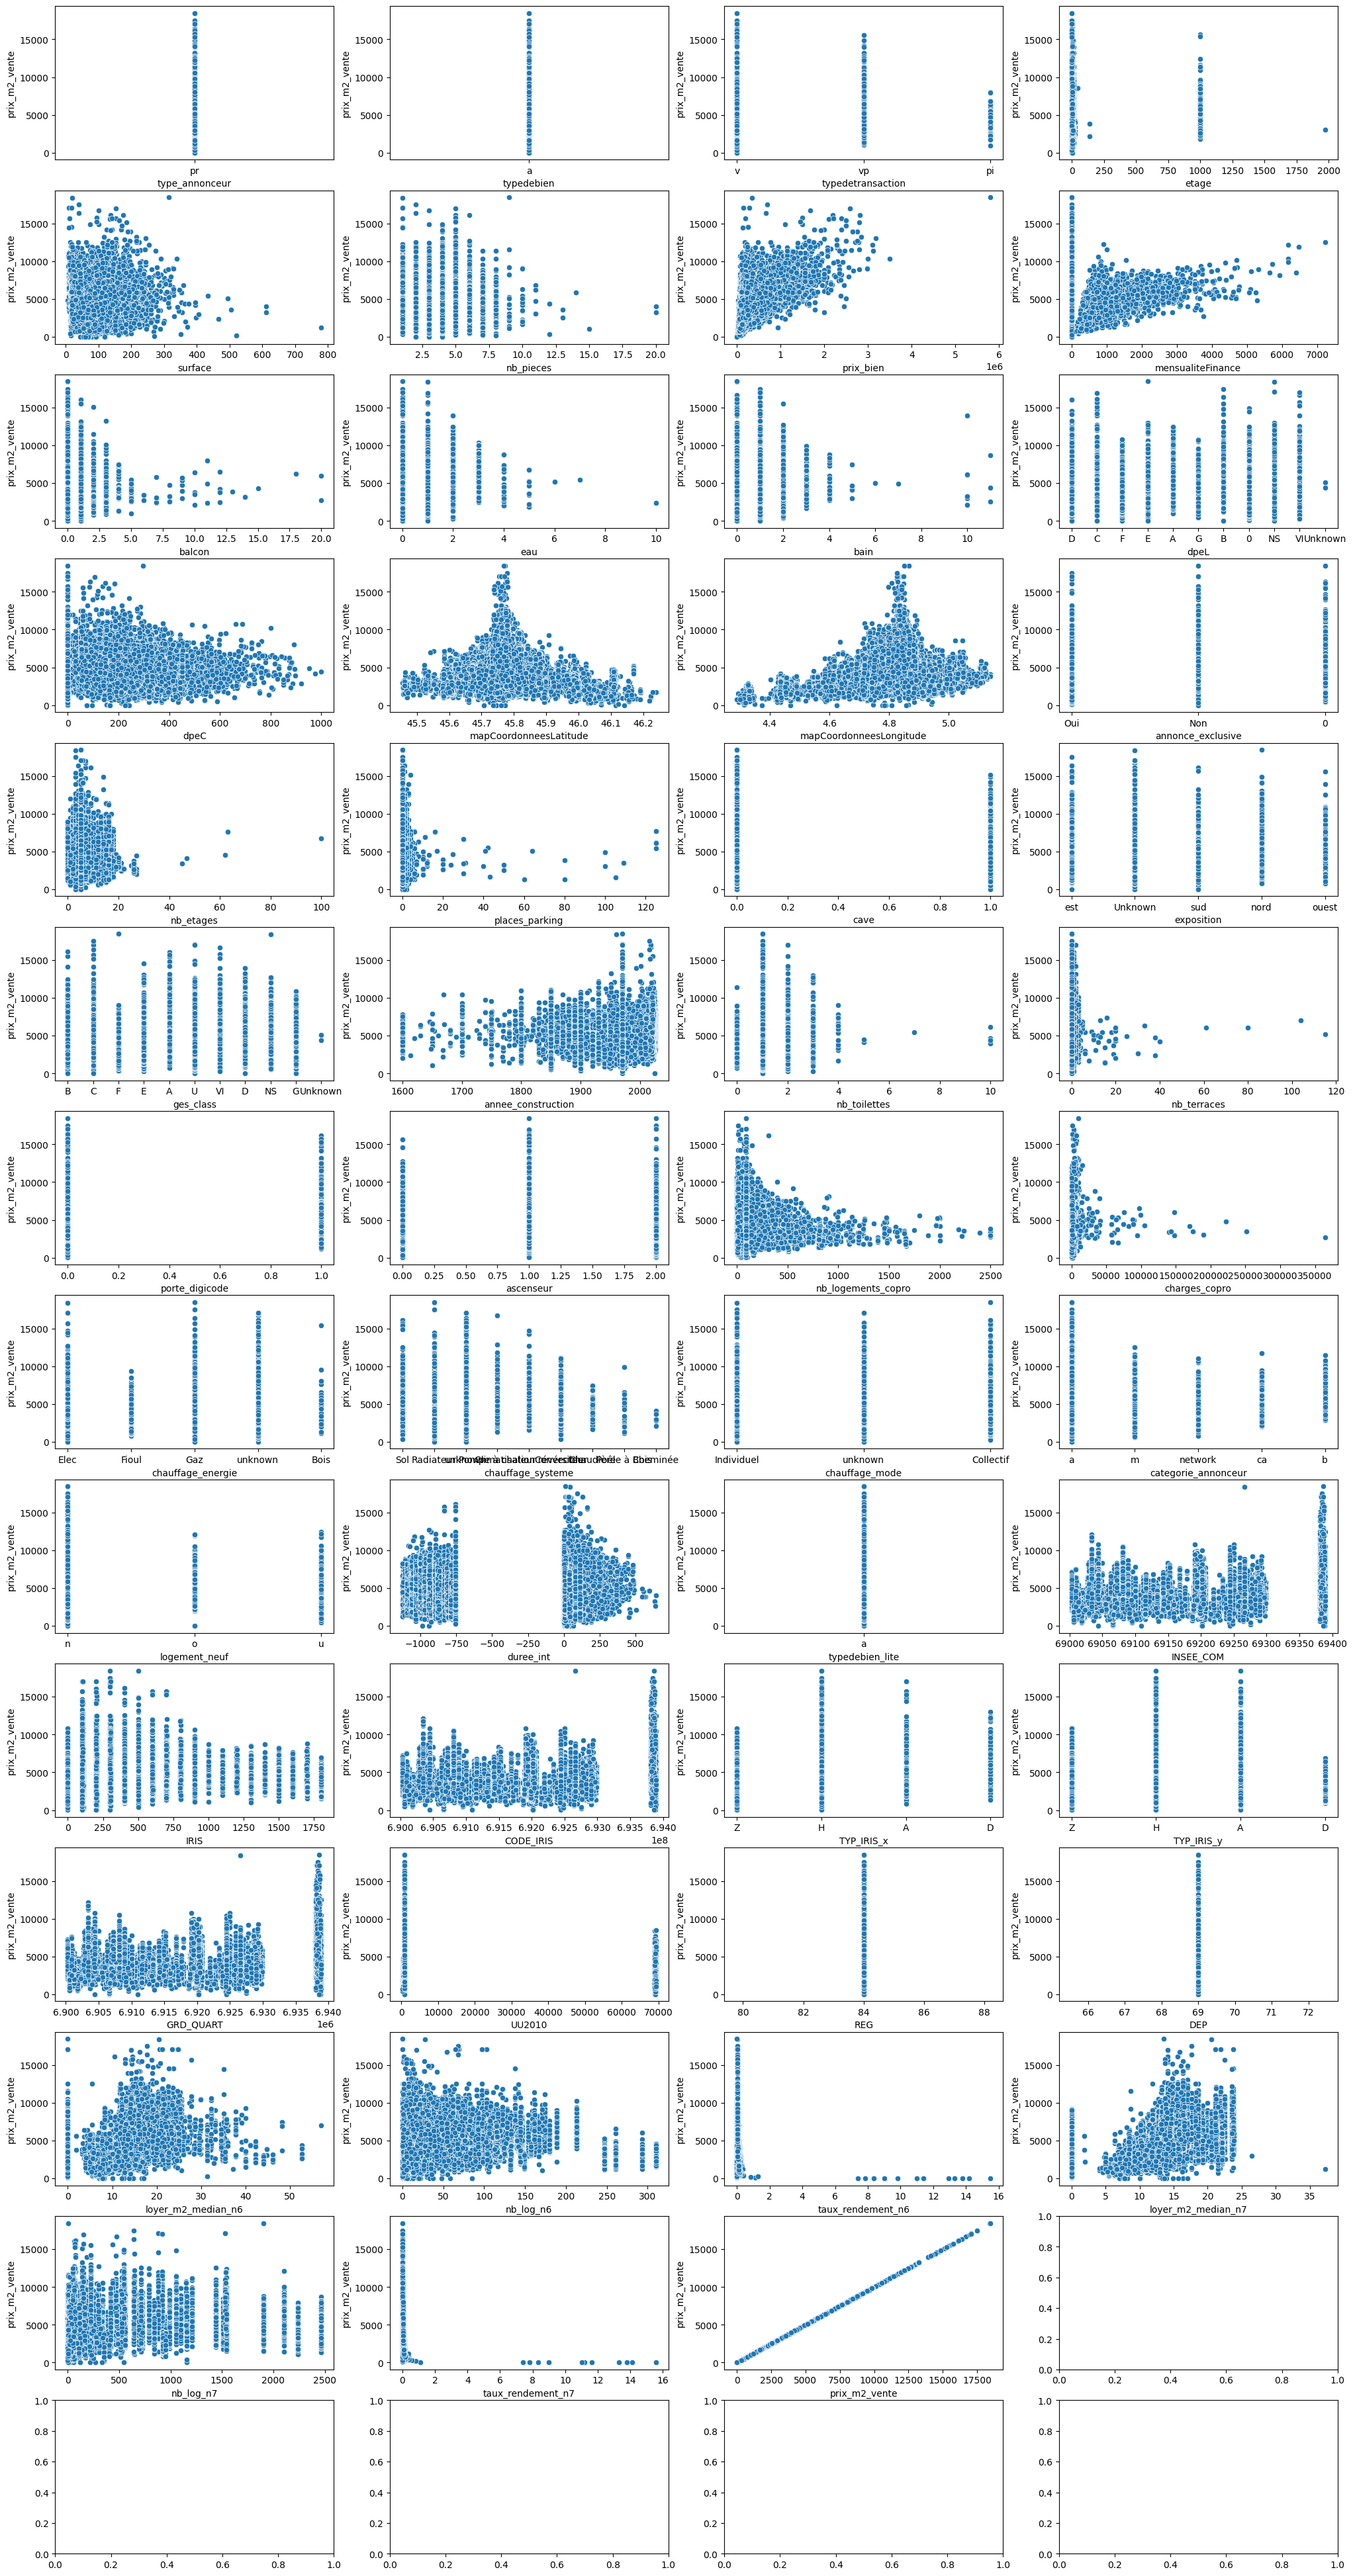

In [21]:

df.sort_values(by="prix_m2_vente",ascending=True)
columns = df.columns
print (type(columns))
nrows = int(columns.size/4) +1
fig , axes = plt.subplots(nrows = nrows, ncols = 4, figsize = (25,50))
index = 0
for column in columns :
    if column not in ["idannonce","date"] :
        sns.scatterplot(ax=axes[int(index/4),index%4],y=df["prix_m2_vente"],x=df[column])
        index = index +1

        

Index(['idannonce', 'type_annonceur', 'typedebien', 'typedetransaction',
       'etage', 'surface', 'nb_pieces', 'prix_bien', 'mensualiteFinance',
       'balcon', 'eau', 'bain', 'dpeL', 'dpeC', 'mapCoordonneesLatitude',
       'mapCoordonneesLongitude', 'annonce_exclusive', 'nb_etages',
       'places_parking', 'cave', 'exposition', 'ges_class',
       'annee_construction', 'nb_toilettes', 'nb_terraces', 'porte_digicode',
       'ascenseur', 'nb_logements_copro', 'charges_copro', 'chauffage_energie',
       'chauffage_systeme', 'chauffage_mode', 'categorie_annonceur',
       'logement_neuf', 'duree_int', 'typedebien_lite', 'date', 'INSEE_COM',
       'IRIS', 'CODE_IRIS', 'TYP_IRIS_x', 'TYP_IRIS_y', 'GRD_QUART', 'UU2010',
       'REG', 'DEP', 'loyer_m2_median_n6', 'nb_log_n6', 'taux_rendement_n6',
       'loyer_m2_median_n7', 'nb_log_n7', 'taux_rendement_n7',
       'prix_m2_vente'],
      dtype='object')


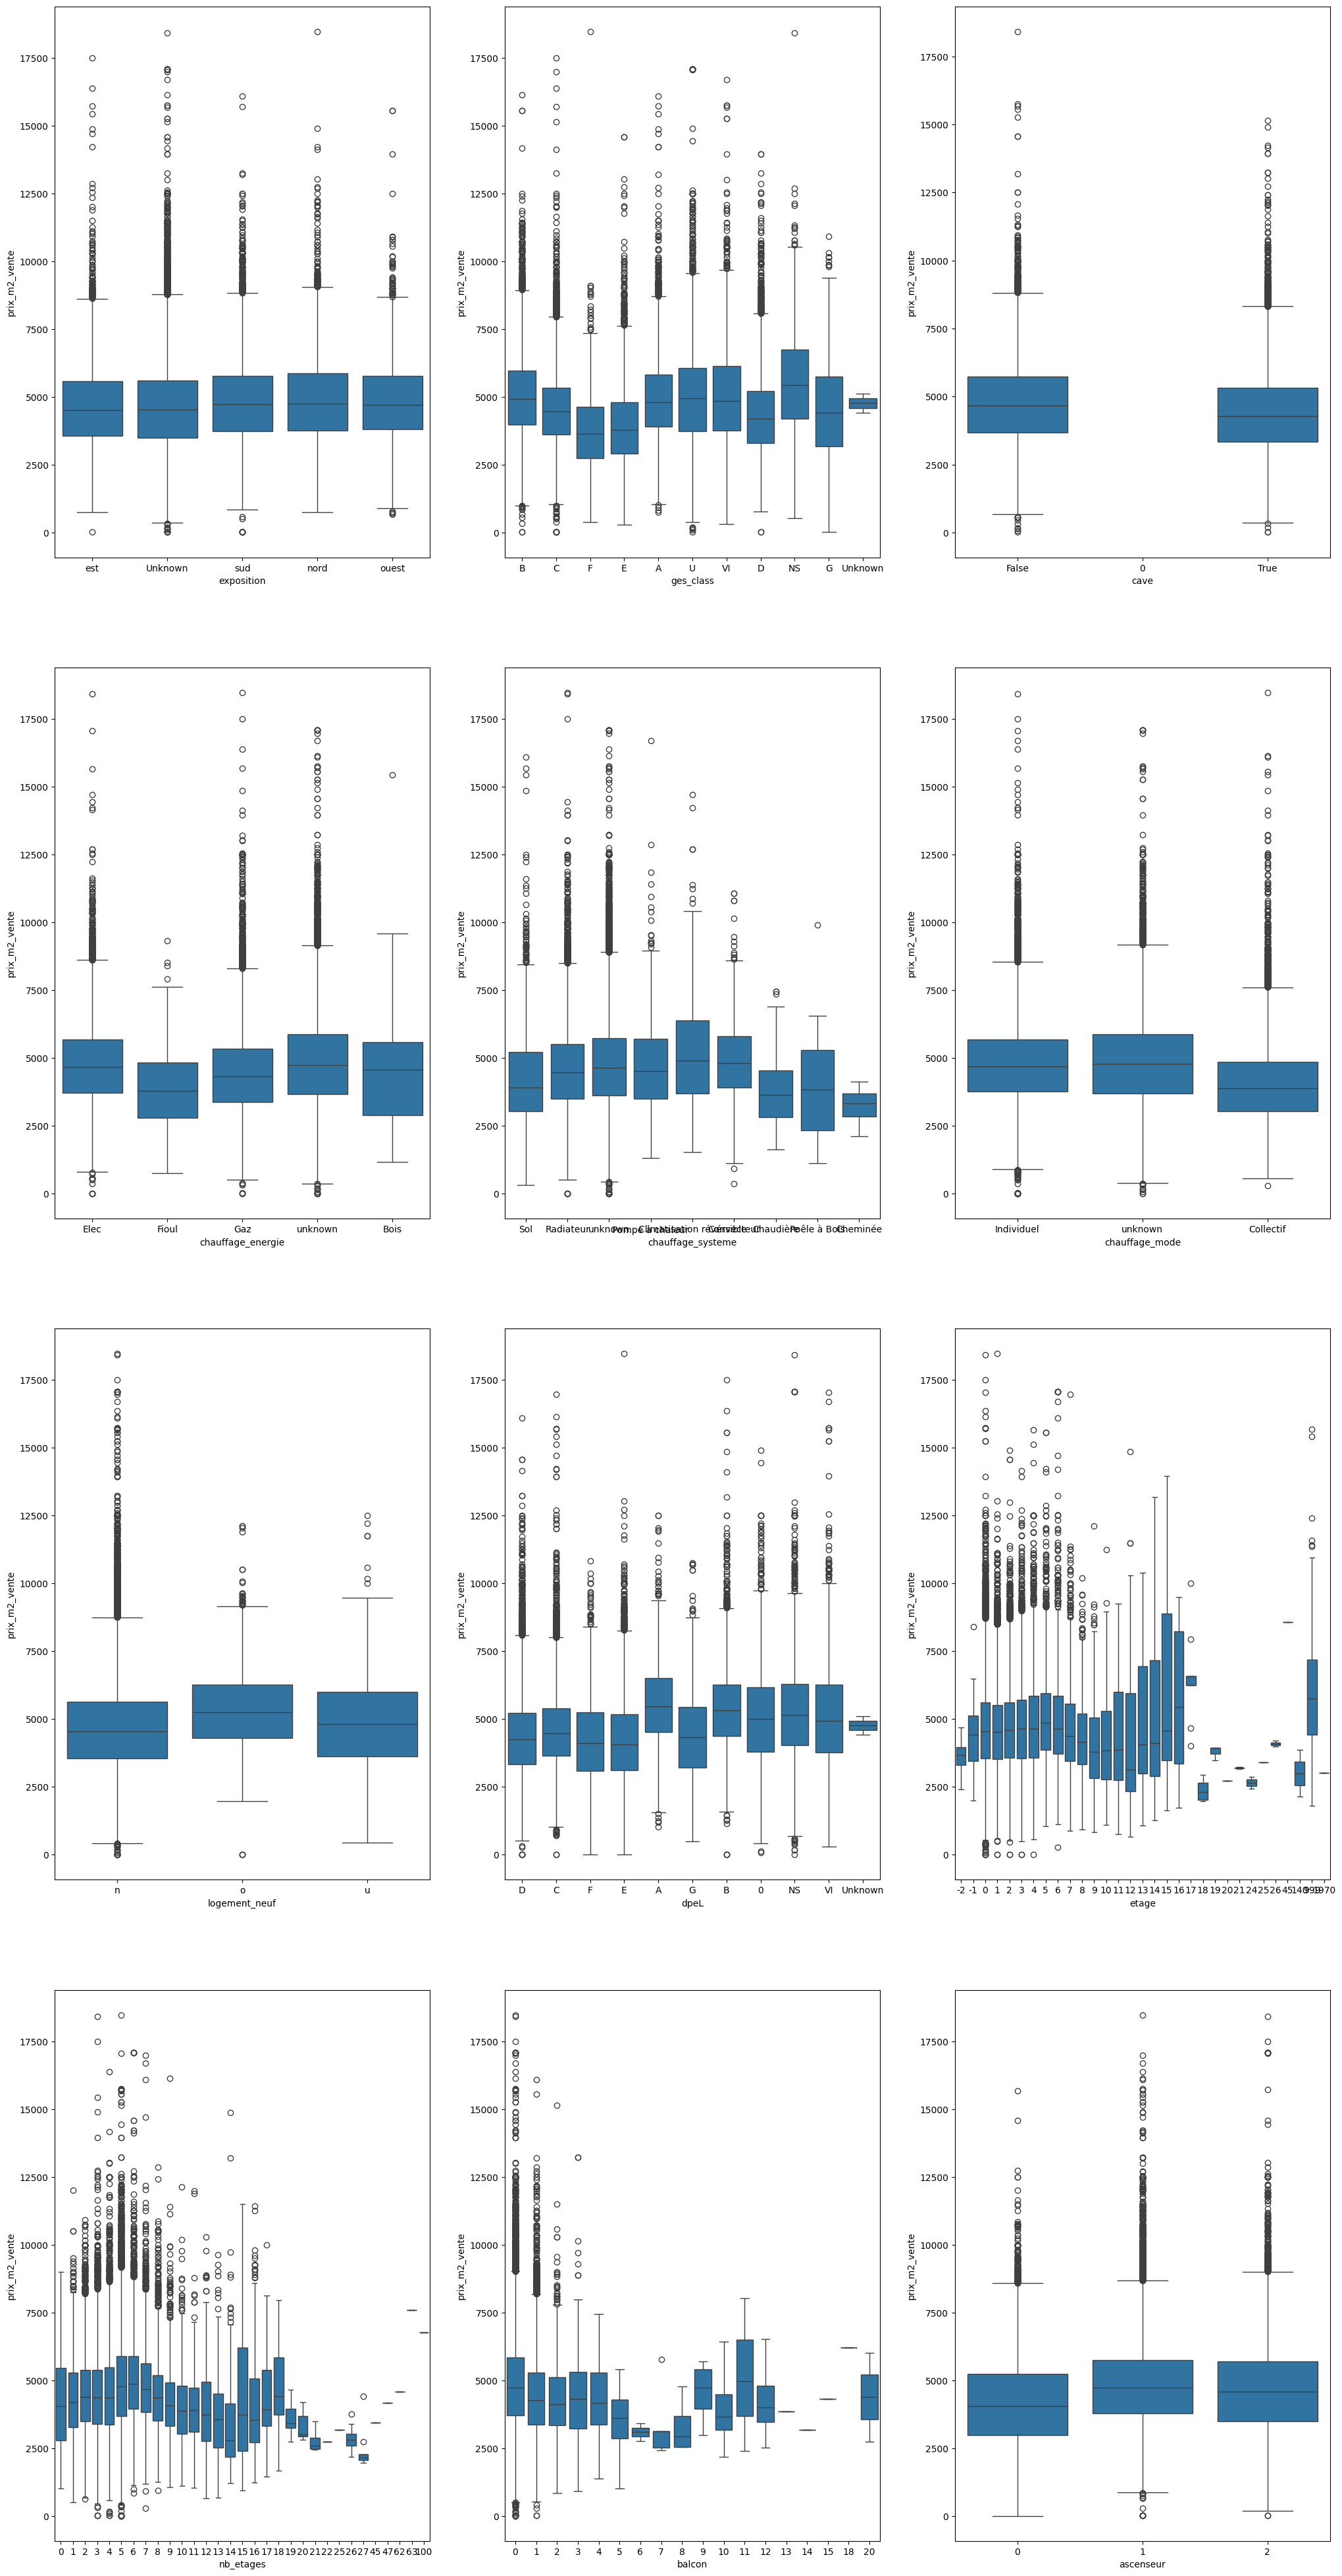

In [22]:
print (df.columns)

ncols=3
fig , axes = plt.subplots(nrows = 4, ncols = ncols, figsize = (25,50))
index = 0
columns = ["exposition","ges_class","cave",'chauffage_energie',
       'chauffage_systeme', 'chauffage_mode','logement_neuf','dpeL',"etage","nb_etages","balcon","ascenseur"]
for column in columns :
    sns.boxplot(ax=axes[int(index/ncols),index%ncols],y=df["prix_m2_vente"],x=df[column])
    index = index +1
